In [41]:
# 1. Load Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Display plots inside notebook
%matplotlib inline

# 2. Load Cleaned Data
df = pd.read_csv('/Users/sptsai/Documents/GitHub/Stroke_Prediction/stroke_data.csv')

# Fill missing values
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# 3. Basic Info and Summary
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe())

Shape of dataset: (5110, 12)

Column names: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Missing values:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Data types:
 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Summary statistics:
                  id          age  hypertension  heart_disease  \
count   5110.000000  5110.

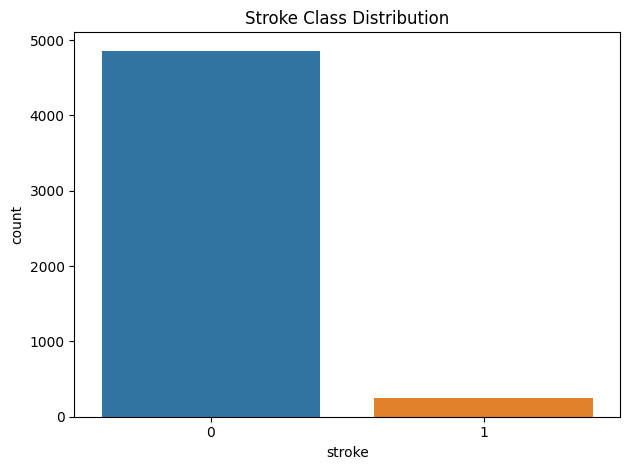

Class proportions:
 stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


In [42]:
# 4. Check Class Imbalance
sns.countplot(x='stroke', data=df)
plt.title("Stroke Class Distribution")
plt.tight_layout()
plt.show()

# Proportions
stroke_proportions = df['stroke'].value_counts(normalize=True)
print("Class proportions:\n", stroke_proportions)

/Users/sptsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


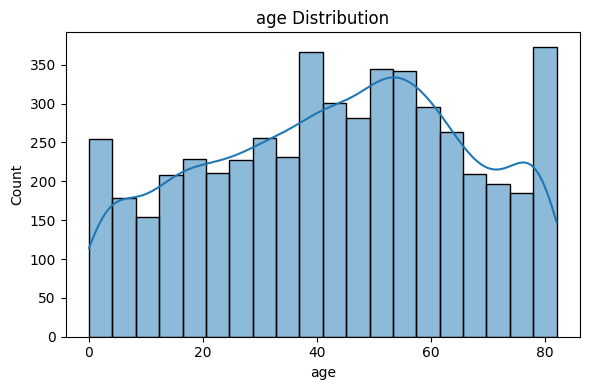

/Users/sptsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


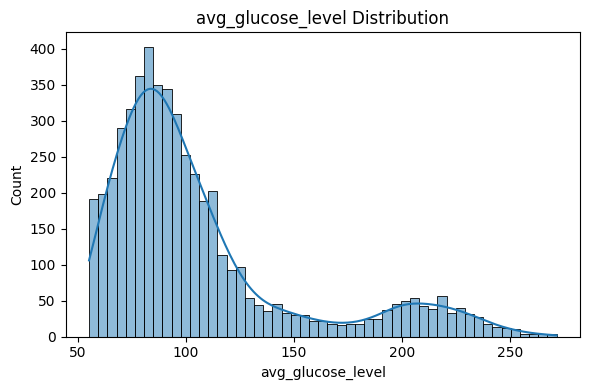

/Users/sptsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


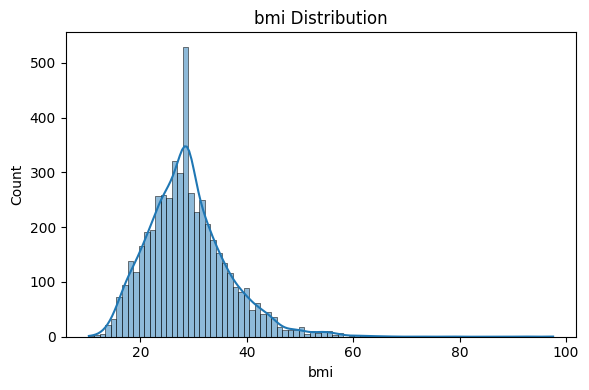

In [43]:
# 5. Distributions of Continuous Variables
continuous_features = ['age', 'avg_glucose_level', 'bmi']

for col in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.tight_layout()
    plt.show()

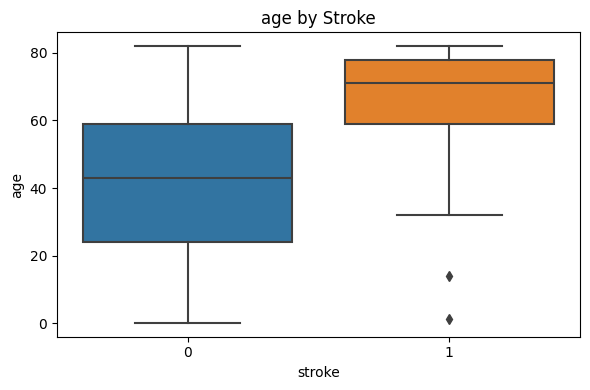

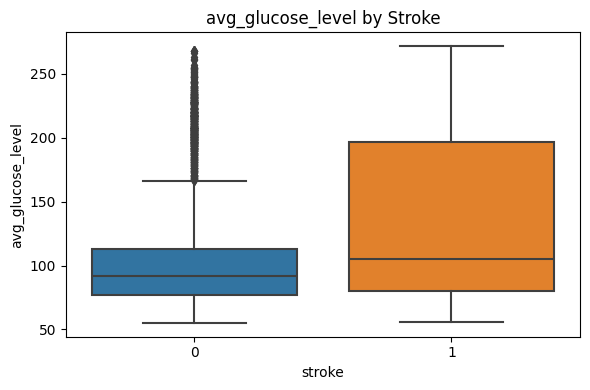

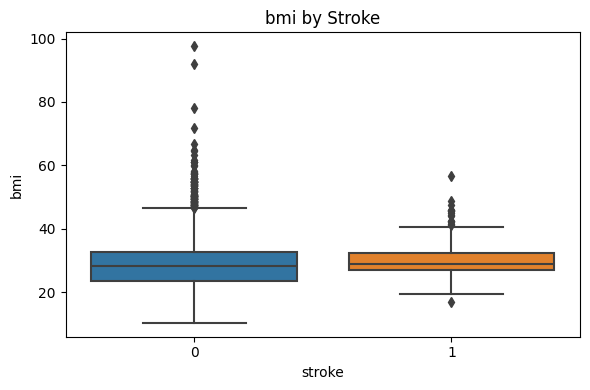

In [44]:
# 6. Boxplots: Continuous Features vs Stroke
for col in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f"{col} by Stroke")
    plt.tight_layout()
    plt.show()

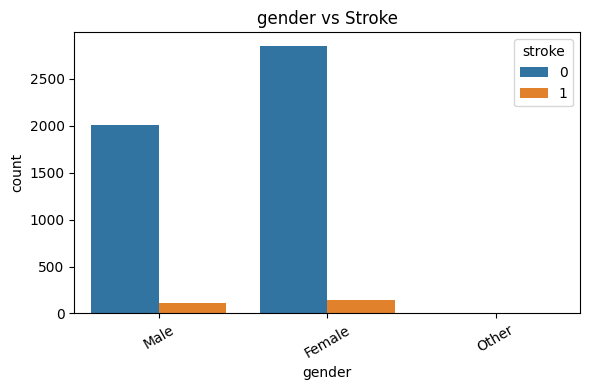

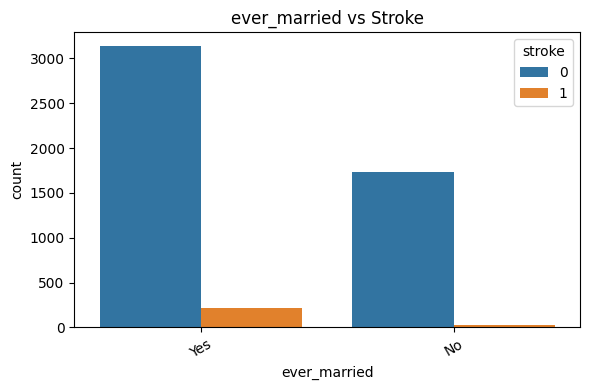

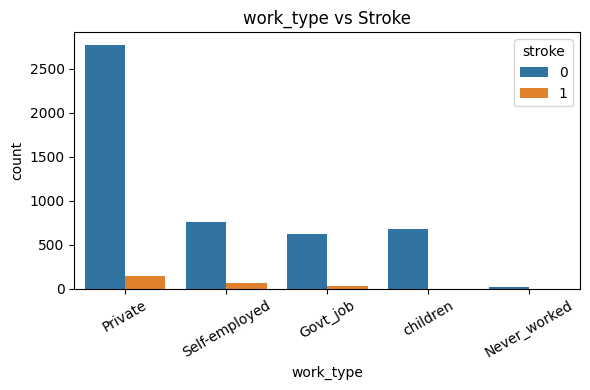

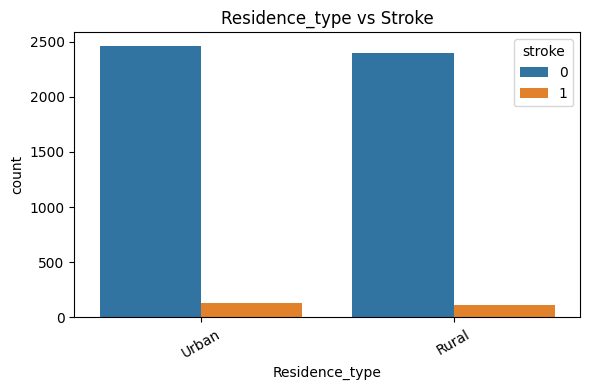

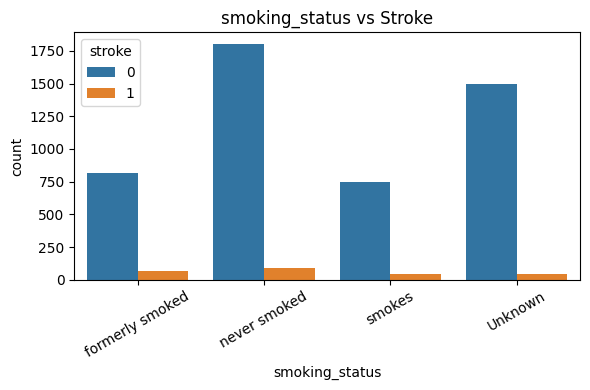

In [45]:
# 7. Categorical Variables vs Stroke
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='stroke', data=df)
    plt.title(f"{col} vs Stroke")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

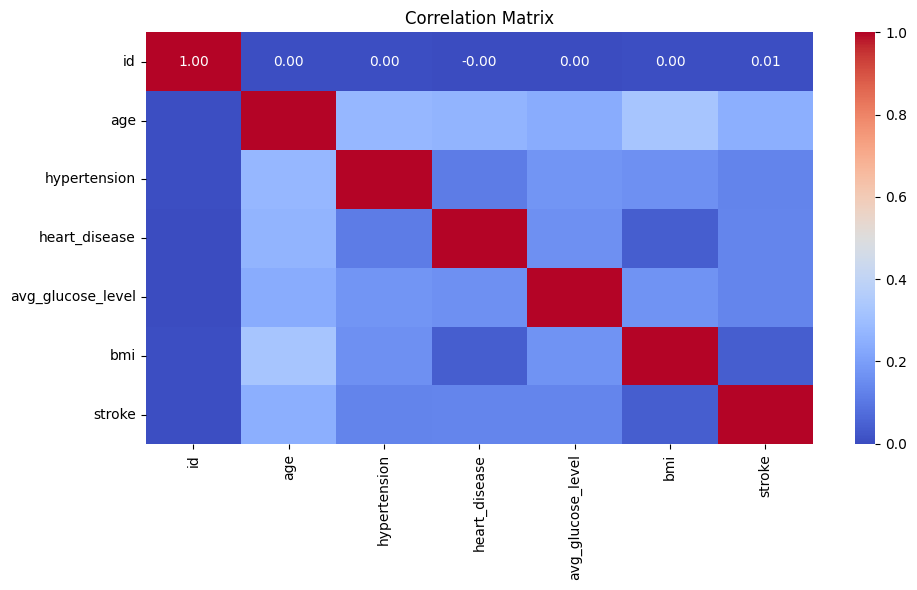

In [46]:
# 8. Correlation Matrix (Numeric Features)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

/Users/sptsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sptsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/sptsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/sptsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119:

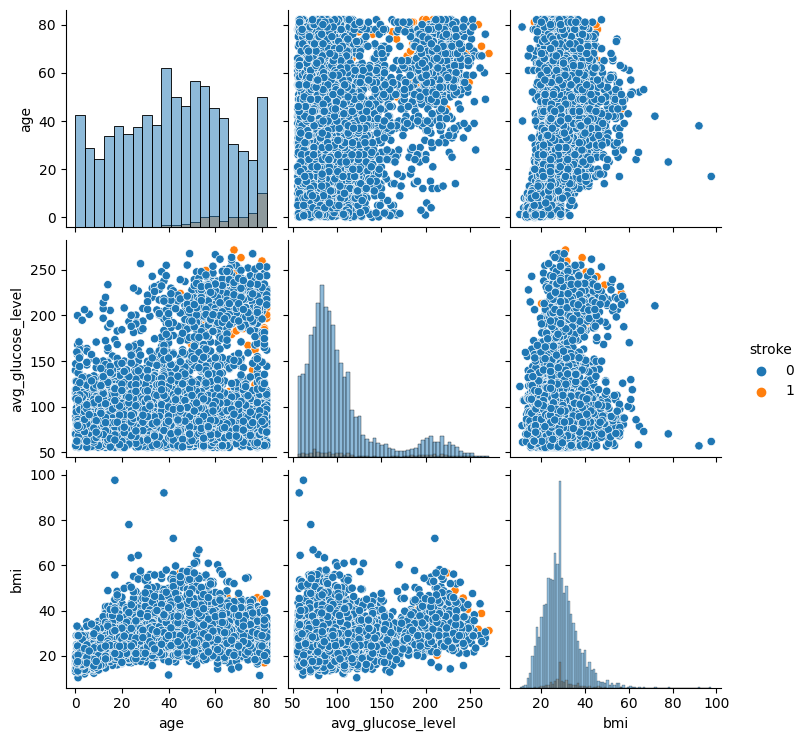

In [ ]:
# 9. Optional: Pairplot (for small numeric sets)
selected = ['age', 'avg_glucose_level', 'bmi', 'stroke']

# Ensure numeric types
df[selected] = df[selected].apply(pd.to_numeric, errors='coerce')

# Drop potential hidden NaNs
df_clean = df[selected].dropna()

# Plot with histograms to avoid KDE errors
sns.pairplot(df_clean, hue='stroke', diag_kind='hist')
plt.show()

In [ ]:
# 10. Insights Summary (Markdown or Code Cell)
print("""
Insights:
- The dataset is imbalanced (most patients did not have a stroke).
- Age and avg_glucose_level tend to be higher in stroke patients.
- Some work types and smoking statuses show differences in stroke frequency.
- The strongest numeric correlation with stroke appears to be with age and glucose.
""")


Insights:
- The dataset is imbalanced (most patients did not have a stroke).
- Age and avg_glucose_level tend to be higher in stroke patients.
- Some work types and smoking statuses show differences in stroke frequency.
- The strongest numeric correlation with stroke appears to be with age and glucose.

